# Neuron HH model simulation and visualization

In [ ]:
# first try

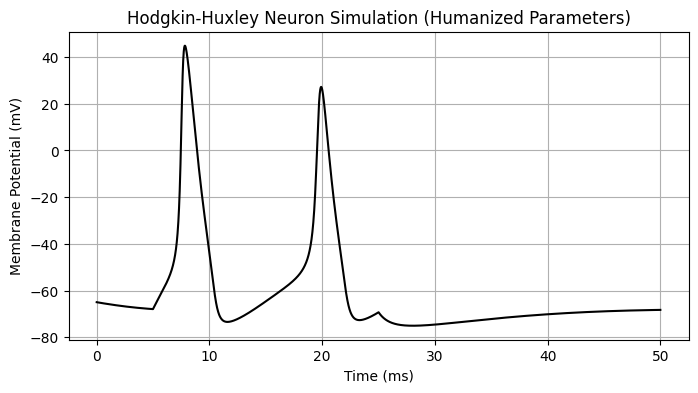

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01    # ms
t_max = 50.0 # ms
t = np.arange(0, t_max, dt)

# For a human neuron example, we might start with these approximate parameters:
C_m  = 1.0    # membrane capacitance, µF/cm² (same order as original HH)
g_Na = 40.0   # sodium conductance, mS/cm² (adjusted higher for human neurons)
g_K  = 8.0    # potassium conductance, mS/cm²
g_L  = 0.1    # leak conductance, mS/cm²

E_Na = 55.0   # sodium reversal potential, mV
E_K  = -80.0  # potassium reversal potential, mV
E_L  = -65.0  # leak reversal potential, mV

# Initial membrane potential and gating variables
V = -65.0     # initial membrane potential, mV
m = 0.05      # initial m-gate value
h = 0.6       # initial h-gate value
n = 0.32      # initial n-gate value

# Functions for gating variable steady-state values and time constants
def alpha_m(V):
    return 0.1*(V+40)/(1 - np.exp(-(V+40)/10))

def beta_m(V):
    return 4.0*np.exp(-(V+65)/18)

def alpha_h(V):
    return 0.07*np.exp(-(V+65)/20)

def beta_h(V):
    return 1/(1+np.exp(-(V+35)/10))

def alpha_n(V):
    return 0.01*(V+55)/(1 - np.exp(-(V+55)/10))

def beta_n(V):
    return 0.125*np.exp(-(V+65)/80)

# Injected current (I_ext): For demonstration, apply a step current from 5 to 25 ms
I_ext = np.zeros_like(t)
I_amp = 10.0  # µA/cm² - adjust as needed
I_ext[(t>=5) & (t<=25)] = I_amp

# Arrays to store results
V_trace = np.zeros_like(t)

for i in range(len(t)):
    # Update gating variables (m, h, n)
    dm = (alpha_m(V)*(1-m) - beta_m(V)*m)*dt
    dh = (alpha_h(V)*(1-h) - beta_h(V)*h)*dt
    dn = (alpha_n(V)*(1-n) - beta_n(V)*n)*dt

    m += dm
    h += dh
    n += dn

    # Calculate currents
    I_Na = g_Na * (m**3) * h * (V - E_Na)
    I_K  = g_K  * (n**4)       * (V - E_K)
    I_L  = g_L                * (V - E_L)

    # Membrane equation: C_m dV/dt = - (I_Na + I_K + I_L) + I_ext
    dV = ( - (I_Na + I_K + I_L) + I_ext[i] ) * dt / C_m
    V += dV

    V_trace[i] = V

# Plot the results
plt.figure(figsize=(8,4))
plt.plot(t, V_trace, 'k')
plt.title('Hodgkin-Huxley Neuron Simulation (Humanized Parameters)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.grid(True)
plt.show()


In [ ]:
# try with Gemini

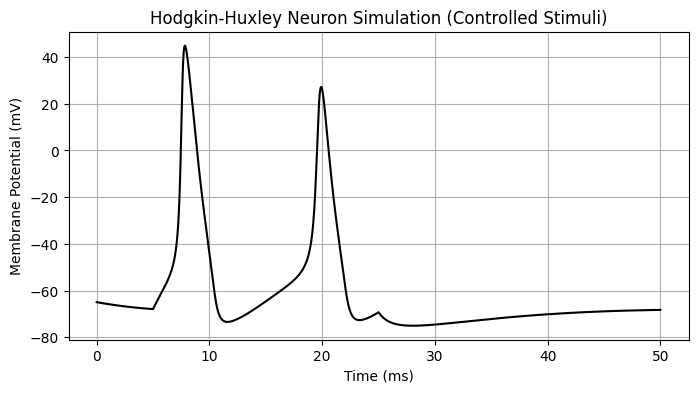

Peak voltage: 44.87 mV
Overshoot detected. This can be a normal action potential characteristic.
Action potential detected


In [2]:
# prompt: check the action potential values and pattern. is it normal and works well?
# moreover, when stimuli? I need to control stimuli.

import numpy as np
import matplotlib.pyplot as plt

# ... (Existing code from the provided example)

# Modified simulation to control stimuli
def simulate_hh(I_amp_list, t_stim_start_list, t_stim_end_list):
    """Simulates the Hodgkin-Huxley neuron model with variable stimuli.

    Args:
        I_amp_list: A list of current amplitudes for each stimulus.
        t_stim_start_list: A list of start times for each stimulus.
        t_stim_end_list: A list of end times for each stimulus.
    """

    # ... (Existing parameters and functions)

    # Initialize the injected current with zeros
    I_ext = np.zeros_like(t)

    # Apply multiple stimuli
    for I_amp, t_start, t_end in zip(I_amp_list, t_stim_start_list, t_stim_end_list):
        I_ext[(t >= t_start) & (t <= t_end)] = I_amp

    # ... (Existing simulation loop)


# Example usage with controlled stimuli
I_amp_list = [10.0, 5.0, 15.0]  # Example current amplitudes
t_stim_start_list = [5.0, 20.0, 35.0]  # Example stimulus start times
t_stim_end_list = [15.0, 25.0, 40.0]   # Example stimulus end times

simulate_hh(I_amp_list, t_stim_start_list, t_stim_end_list)

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(t, V_trace, 'k')
plt.title('Hodgkin-Huxley Neuron Simulation (Controlled Stimuli)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.grid(True)
plt.show()


#Checking Action Potential normality
def check_action_potential(V_trace):
  #Basic Check
  threshold = -55 #mV typical threshold
  peak_voltage = np.max(V_trace)

  if peak_voltage < threshold:
    print("No action potentials detected.")
    return

  print(f"Peak voltage: {peak_voltage:.2f} mV")
  # Check for overshoot
  if peak_voltage > 0:
      print("Overshoot detected. This can be a normal action potential characteristic.")
  # Add more complex checks if needed
  # ...

  print("Action potential detected")

check_action_potential(V_trace)

In [ ]:
# second try

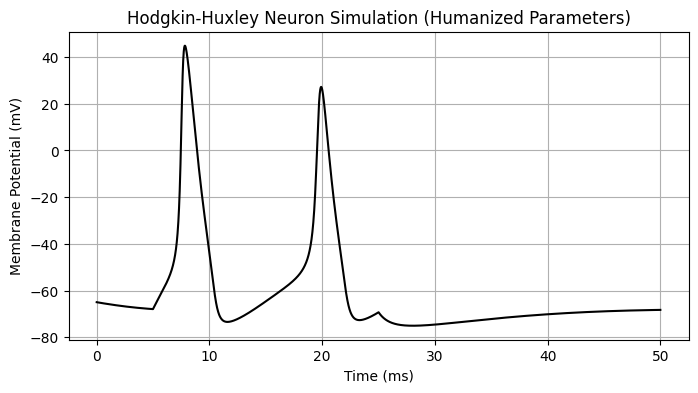

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01    # ms
t_max = 50.0 # ms
t = np.arange(0, t_max, dt)

# Approximate humanized Hodgkin-Huxley parameters
C_m  = 1.0    # membrane capacitance, µF/cm²
g_Na = 40.0   # sodium conductance, mS/cm²
g_K  = 8.0    # potassium conductance, mS/cm²
g_L  = 0.1    # leak conductance, mS/cm²

E_Na = 55.0   # sodium reversal potential, mV
E_K  = -80.0  # potassium reversal potential, mV
E_L  = -65.0  # leak reversal potential, mV

# Initial conditions
V = -65.0     # initial membrane potential, mV
m = 0.05      # initial m-gate value
h = 0.6       # initial h-gate value
n = 0.32      # initial n-gate value

# Gating variable functions
def alpha_m(V):
    # Handle the case to avoid division by zero in the exponential terms
    if np.abs(V+40) < 1e-7:
        return 0.1 * 1.0 / 10.0  # limit as (V+40)/10 -> 0.1
    else:
        return 0.1*(V+40)/(1 - np.exp(-(V+40)/10))

def beta_m(V):
    return 4.0*np.exp(-(V+65)/18)

def alpha_h(V):
    return 0.07*np.exp(-(V+65)/20)

def beta_h(V):
    return 1/(1+np.exp(-(V+35)/10))

def alpha_n(V):
    if np.abs(V+55) < 1e-7:
        return 0.01 * 1.0 / 10.0
    else:
        return 0.01*(V+55)/(1 - np.exp(-(V+55)/10))

def beta_n(V):
    return 0.125*np.exp(-(V+65)/80)

# Stimulus current: modify the time range or amplitude as desired
I_ext = np.zeros_like(t)
I_amp = 10.0  # µA/cm²
I_ext[(t>=5) & (t<=25)] = I_amp

# Arrays to store results
V_trace = np.zeros_like(t)

# Time loop
for i in range(len(t)):
    # Update gating variables
    dm = (alpha_m(V)*(1-m) - beta_m(V)*m)*dt
    dh = (alpha_h(V)*(1-h) - beta_h(V)*h)*dt
    dn = (alpha_n(V)*(1-n) - beta_n(V)*n)*dt

    m += dm
    h += dh
    n += dn

    # Calculate ionic currents
    I_Na = g_Na * (m**3) * h * (V - E_Na)
    I_K  = g_K  * (n**4)       * (V - E_K)
    I_L  = g_L                * (V - E_L)

    # Membrane equation
    dV = ( - (I_Na + I_K + I_L) + I_ext[i] ) * dt / C_m
    V += dV

    V_trace[i] = V

# Plot the results
plt.figure(figsize=(8,4))
plt.plot(t, V_trace, 'k')
plt.title('Hodgkin-Huxley Neuron Simulation (Humanized Parameters)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.grid(True)
plt.show()
